# Data Preprocessing
Prerequisites:
- Python experience, including a basing understanding of python syntax, loops, conditional statements, functions, and data types in python
- Some background in statistics is helpful

Goals for this session:
- Learn to perform basic exploratory data analysis (EDA) and data visualization
- Identify outliers, handle missing values, and perform other common data operations such as normalization and covariate analysis
- Understand the intuition behind various preprocessing techniques for both categorical and continuous features
- Apply EDA and data preprocessing techniques to the Titanic dataset from Kaggle


# Titanic Dataset
In this code-along exercise, we will cover the following data processing techniques:
- Basic DataFrame operations
- Handling missing values
- Engineering new features
- Removing outliers
- Normalization
- Converting categorical variables to numbers

[Pandas documentation](https://pandas.pydata.org/docs/reference/frame.html)

# Imports
By convention, we use the `as` in the import statement to alias `numpy` to `np`. Similarly, we alias `pandas` to `pd`. Another convention we will use is calling Pandas DataFrame objects `df`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the data
The [Titanic dataset](https://www.kaggle.com/competitions/titanic/data) contains information regarding the survival of Titanic passengers.

In this section, we are going to examine the data and handle cases with outliers and missing values.

In [2]:
# Use this in Colab
df = pd.read_csv("https://raw.githubusercontent.com/WAT-ai/onboarding-tutorials-2023/main/special_topics/CxC%20data%20workshop/data/titanic.csv")

# DataFrame basics

To view the first `n` lines of a DataFrame, we can use `df.head(n)`. By default, `n = 5`. Similarly, to view the last `n` lines, we can use `df.tail(n)`.

In the Jupyter Notebook, the last line of each cell executed prints to the notebook. Simply writing `df` as the last line in a cell will print out an abridged version of the DataFrame.

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Note that the Jupyter Notebook also prints out the number of rows and columns of the DataFrame when we just let it autoprint the DataFrame. We can can so view the shape of the DataFrame using `df.shape`. By convention, the first number in the tuple is the number of rows and the second number is the number of columns.

In [6]:
df.shape

(891, 12)

We can access the index and column axes of the DataFrame with `df.index` and `df.columns` respectively. The values of the DataFrame can be access with `df.values` which returns a numpy array.

In [8]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

Other conventions
- Specify one column with `"column name"`, specify multiple columns with `["list", "of", "column", "names"]`
- Index (`axis=0`) contains a unique identifier for each of the rows; Columns (`axis=1`) contain a unique identifier for each of the columns
- Most operations default to applying to the Index axis. It's best practice to specify the axis directly for clairty.

# Viewing subsets
Just selecting data from a dataframe will not apply the operation to the dataframe, unless we assign it to a variable.

To view just a single columns, we can index the dataframe with that column name. Note that a single column will be returned as a `Series` object, which is similar to a dataframe, but with just one column. Therefore, some operations cannot be applied as with dataframes.

In [17]:
# Select the name column
df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


To view multiple columns, pass in a list of column names. When multiple columns are selected, a `DataFrame` is returned.

In [21]:
# View the Name and Sex columns
df.iloc["Name"]

TypeError: Cannot index by location index with a non-integer key

There are two ways to select rows. If you know the row index or indicies, you can use `df.iloc[i]` or `df.iloc[[i, j, k]]` to select those rows.

If you know a condition on the values, you should use `df.loc[index_mask, columns]`. `index_mask` Boolean mask is a `(n,)` sized array of `True` or `False` values, while `columns` is a list of the columns. If `columns` are not specified, it will be assumed that all columns are selected, while rows will be filtered according to `index_mask`.

The mask can be made from taking a Series and applying a Boolean logic operator to it. For example,
`mask = df[col] == value`. Multiple masks can be combined with AND (`&`) and OR (`|`) elementwise operators, with mask expressions in brackets.

In [ ]:
# Select rows 1, 3, and 5


In [13]:
# View the name and class of men whose age is greater than 70
mask = (df["Sex"] == "male") & (df["Age"] > 70)
df.loc[mask, ["Name", "Pclass"]]

,Name,Pclass
96,"Goldschmidt, Mr. George B",1
116,"Connors, Mr. Patrick",3
493,"Artagaveytia, Mr. Ramon",1
630,"Barkworth, Mr. Algernon Henry Wilson",1
851,"Svensson, Mr. Johan",3


# Visualization

In [ ]:
# Distributions of continuous variables against a categorical variable
sns.kdeplot(data=df, x='Age', hue='Sex', multiple="stack")
plt.show()

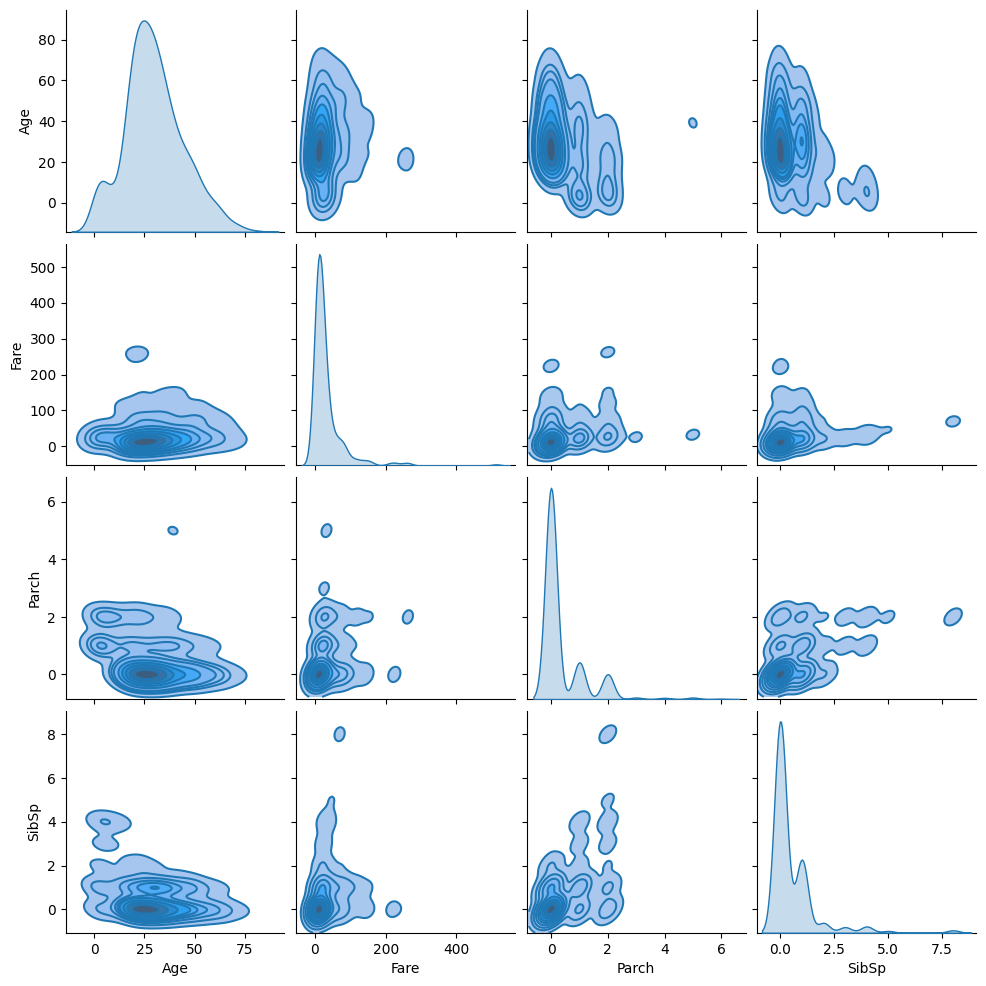

In [22]:
# Pairplots of continuous variables
g = sns.pairplot(df[["Age", "Fare", "Parch", "SibSp"]], kind="kde")
g.map_offdiag(sns.kdeplot, fill=True, color='C0')
plt.show()

# Missing Data
On a small dataset like there, here's an easy way to visualize how much data is missing. Clearly, many passengers are missing a Cabin, and some are missing an age. Oddly, at least one passenger has no information on where they embarked from.

In [ ]:
sns.heatmap(df.isna(), cmap='Blues')

In [24]:
# Select where Embarked is NA
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


**What to do with missing values is a design decision.**

One option would be to drop the entire Embarked column. It might appear as if the port where passengers embark impacts their likelihood of survival, but higher class passengers were also more likely to board at certain ports. This feature might not actually be useful in classifying survival.

<Axes: xlabel='Embarked', ylabel='Survived'>

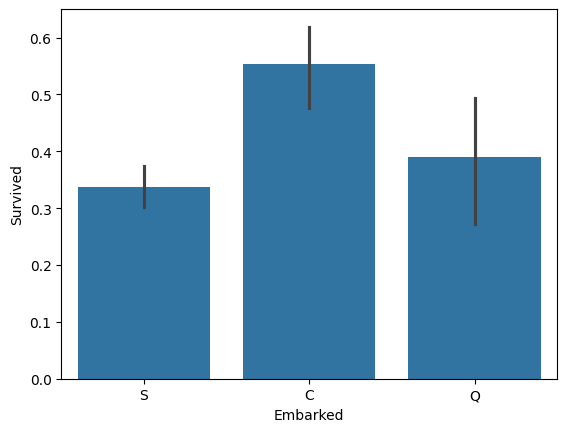

In [23]:
sns.barplot(x=df.Embarked, y=df.Survived)

<Axes: xlabel='Embarked', ylabel='Pclass'>

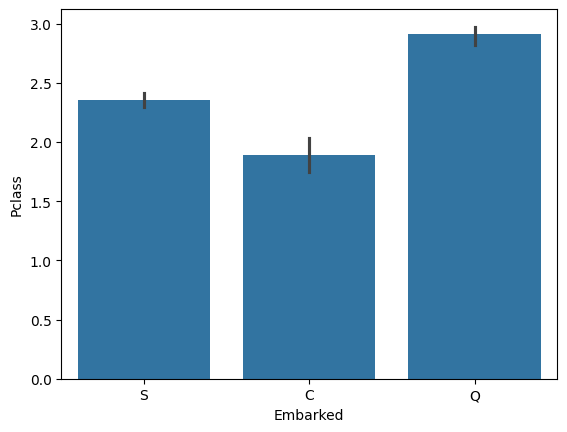

In [25]:
sns.barplot(x=df.Embarked, y=df.Pclass)


On the other hand, you could simply drop the two rows with missing values, or try to impute those values using the most likely port that they boarded at.

# Handling Missing Values

Not all missing values are equal. Consider arbitrary survey data taken from the general population.

**Missing Not At Random** - when a value is missing for a reason related to the true value. (Ex: if a survey responding chooses not to disclose their income, this could be because they have an abnormally high or low income)

**Missing at Random** - when a value is missing for a reason related to another observed variable. (Ex: many age values are missing for survey respondents of a particular gender)

**Missing Completely at Random** - when there's no patterns in the missing values.

## Deletion

- Column deletion: removing a column that has too many missing values and is non-essential for your model
- Row deletion: removing rows with missing values, ideally if the missing values are Missing At Random, to avoid biasing your model

In [27]:
df.drop(['Ticket', 'Cabin', 'Name'], axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [28]:
df.dropna(subset="Embarked", axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Deletions can persist if we assign the result to a variable.

In [31]:
df = df.dropna(subset="Embarked", axis=0)

## Imputation

- Fill missing values with their defaults (empty string, zero, etc...)
- Fill missing values with the mean, median, or mode
- Backward or forward fill
- Imputation risks injecting your own bias and adding noise to the data, and should be performed with caution

In [ ]:
df['Age'].fillna(30)

In [ ]:
df['Age'].median(), df['Age'].mean()

Here we will fill missing ages with the mean age.

Another way to make operations persist is to use `inplace=True`.

# Feature Engineering

1. The 'Name' category doesn't tell us much on its own, but the titles can be useful as identifiers. We will extract the titles from the names, and map these to categories, creating a new feature.

In [32]:
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [33]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [34]:
title_mapping = {
    'Mme': 'Mrs',
    'Ms': 'Mrs',
    'Mlle': 'Miss',
    'Dr': 'Officer',
    'Rev': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Capt': 'Officer',
    'Don': 'Noble',
    'Sir': 'Noble',
    'Lady': 'Noble',
    'the Countess': 'Noble',
    'Jonkheer': 'Noble'
}

In [35]:
df['Title'] = df['Title'].map(title_mapping).fillna(df['Title']) # any title not in the mapping is left unchanged

2. The 'SibSp' feature tells us about how many siblings or spouses a passenger has onboard. The 'Parch' feature tells us about the number of parents and children a passenger has onboard. Together, we can create a 'Family Size' feature that represents known relatives. Note that in a linear regression model, linear combinations of features are redundant, but still shown here as an example.

In [ ]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

3. Only first class has Cabin numbers, but they are listed in formats like "G6" or "D10". Let's convert these to a 'Deck' category.

In [ ]:
# utility function to help us parse the cabin numbers
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    return np.nan

In [ ]:
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']
df['Deck'] = df['Cabin'].map(lambda x: substrings_in_string(str(x), cabin_list)).fillna('No Cabin')

People who had cabins were more likely to survive than those who didn't.

In [ ]:
sns.barplot(x=df.Deck, y=df.Survived)

In [ ]:
sns.barplot(x=df.Deck, y=df.Fare)

After making new features, we should drop the columns that were used to make those features.

In [ ]:
df = df.drop(['Ticket', 'Cabin', 'Name', 'SibSp', 'Parch'], axis=1)

# Outlier removal

Outliers are data points that differ significantly from the mean distribution of the data. Often, outliers can represent incorrect measurements, although domain knowledge is often required to interpret the meaning of outliers. We will only analyze the numerical features that are not innately categorical columns.

Based on the datatypes and our understanding of the values in the columns, we should only analyze SibSp, Parch, Fare, and Age for outliers.

In [ ]:
df.dtypes

In [ ]:
# Plotting the distribution
fig, axs = plt.subplots(1, 3, figsize=(6, 3))

feature_cols = ["Age", "Family_Size", "Fare"]

for col, ax in zip(feature_cols, axs.flatten()):
    ax.hist(df[col].values, bins=20)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

Based on these disributions, there aren't any unreasonable values. But for the sake of this workshop, we will remove outliers from the `Fare` column. We will use the heuristic that any values that are 6 standard deviations from the mean, i.e. $x \notin [\mu - 6\sigma, \mu + 6\sigma]$, are outliers. Note that this heuristic typically assumes that the distribution is normal, however, this is clearly not the case for Fare.

Other methods to remove outliers include 1.5*IQR, using median and median absolute deviation, and percentiles.

In [ ]:
# Get quick stats on numeric columns with df.describe()


In [ ]:
lb = None
ub = None
lb, ub

In [ ]:
# Find out how many outliers there are
outlier_mask = (df["Fare"] < lb) | (df["Fare"] > ub)
outlier_mask.sum()

In [ ]:
# Remove outliers by selecting non-outliers



# Feature normalization

As discussed earlier, machine learning models require their inputs to be in vectors. Additionally, a lot of ML models assume that the input data is roughly normally distributed with 0 mean and unit standard deviation, or that the data is scaled between [-1, 1]. By preparing data to have a standard normal distribution generally improves model performance compared to having un-normalized features. Note that many features will not actually have Gaussian or Uniform distributions, but we still apply this scaling anyways.

Scikit-learn has a handy interface to apply common normalization techniques like standard scaling and min-max scaling to entire dataframes.

Here, we will do do standard scaling with just pandas, since many columns here are not relevant to scaling. We only apply this normalization to the numeric feature columns, e.g. Age, Fare, Family_Size.

In [ ]:
# Apply normalization manually
for feature in ["Age", "Fare", "Family_Size"]:
    pass

In [ ]:
df[["Age", "Fare", "Family_Size"]].describe()

We can see that the mean and standard deviation of the features are now 0 and 1 respectively.

## Ordinal Categoricals

The Titanic Dataset contains plenty of categorical data. Many machine learning models require vector inputs with numerical data. So, a very common operation is to encode categorical variables, effectively converting them into integer format.

Ordinal categoricals are discrete categories that have some order. Think "small", "medium", "large". One technique for converting nominal categorical variables to numeric values is label encoding.

An example is the passenger class feature. This feature is already encoded in ordinal integers.

In [ ]:
df.Pclass.value_counts()

Another example of an ordinal categorical is the Deck feature. We know the decks were named in order, with "A" at the top of the ship and "G" at the bottom. We could encode these into a range of [-4, 3] with the lowest number representing the lowest deck. We might choose this range as over 99.7% of data should fall within the [-3, 3] range of a standard normal variable.

In [ ]:
deck_mapping = {
    "A": 3,
    "B": 2,
    "C": 1,
    "D": 0,
    "E": -1,
    "F": -2,
    "G": -3,
    "No Cabin": -4
}

In [ ]:
# Apply the mapping function to the Deck feature


## Nominal Categoricals

Nominal categoricals have no order, so concepts such as mean, min, and max have no interpretation. One particularly popular method of encoding, known as One-Hot Encoding involves representing categorical variables as binary columns.

In Pandas, we can use `get_dummies` to easily make one-hot features.

In [ ]:
# Apply get_dummies to Embarked', Sex, and Title features

# Saving the dataset
Finally, we'll drop the PassengerId feature and save the dataset as a CSV file.

In [ ]:
df = df.drop("PassengerId", axis=1)

In [ ]:
df.to_csv("./data/titanic_preprocessed.csv")